# `satn_profile`
Computes the saturation profiles in an invasion image

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import porespy as ps

ps.visualization.set_mpl_style()

Start by performing a basic invasion simulation:

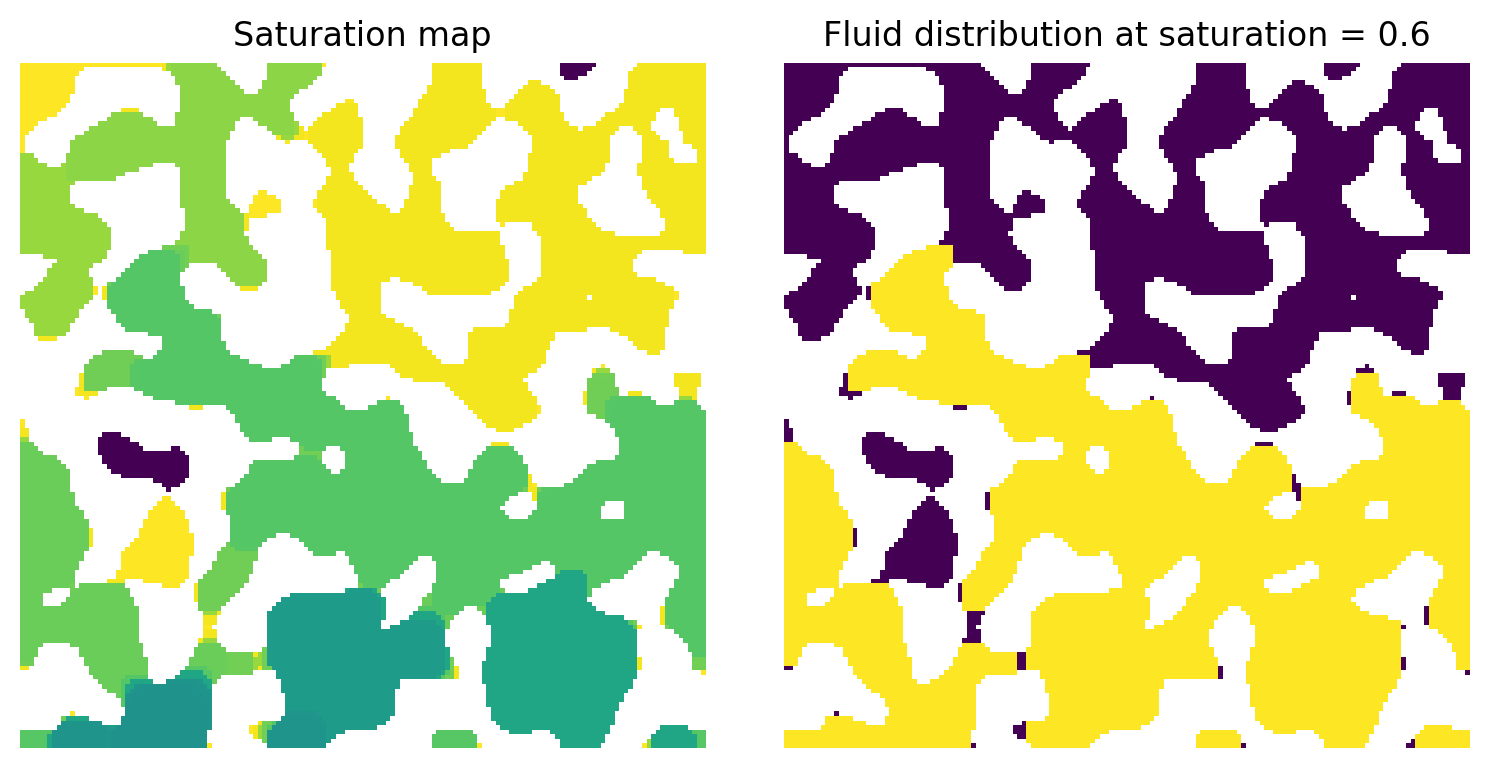

In [2]:
np.random.seed(1)
im = ps.generators.blobs(shape=[150, 150], porosity=0.6, blobiness=1)
pc = ps.filters.capillary_transform(im=im, sigma=0.01, theta=180, g=0)
inlets = np.zeros_like(im)
inlets[0, :] = True
inv = ps.simulations.drainage(im=im, pc=pc, inlets=inlets)

fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(inv.im_snwp/im, interpolation='none', origin='lower')
ax[0].axis(False)
ax[0].set_title('Saturation map')
ax[1].imshow((inv.im_snwp < 0.6)*(inv.im_snwp > 0)/im, interpolation='none', origin='lower')
ax[1].axis(False)
ax[1].set_title('Fluid distribution at saturation = 0.6');

## `satn`
This is the output of the invasion function, converted to saturation if needed:

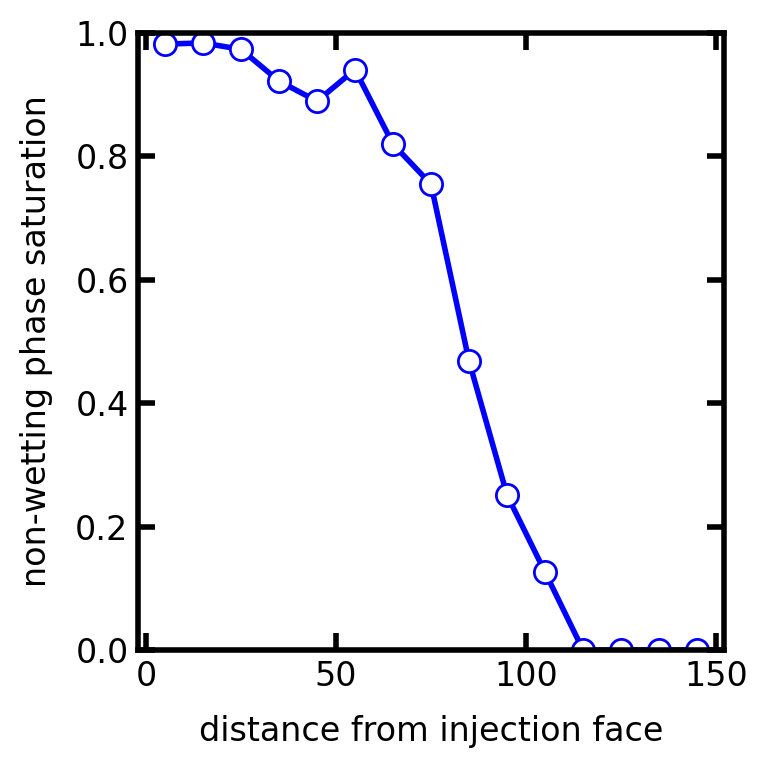

In [3]:
s_prof = ps.metrics.satn_profile(satn=inv.im_snwp, s=0.6)

fig, ax = plt.subplots(figsize=[4, 4])
ax.plot(s_prof.position, s_prof.saturation, 'b-o')
ax.set_xlabel("distance from injection face")
ax.set_ylabel("non-wetting phase saturation")
ax.set_ylim([0, 1]);

## `s`
The global saturation for which the profile should be obtained:

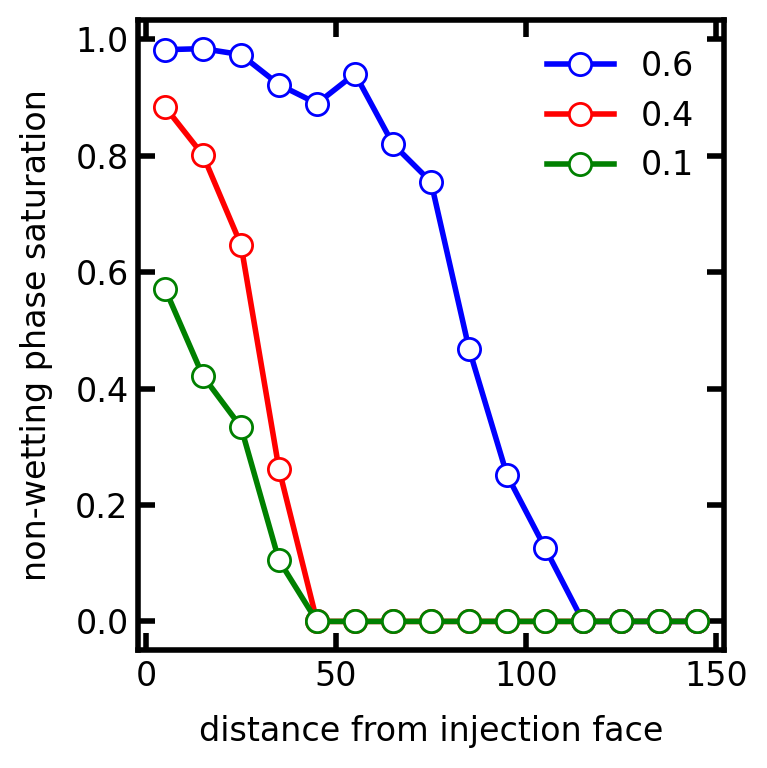

In [4]:
s = 0.6
s_prof1 = ps.metrics.satn_profile(satn=inv.im_snwp, s=s)

fig, ax = plt.subplots(figsize=[4, 4])
ax.plot(s_prof1.position, s_prof1.saturation, 'b-o', label=s)

s = 0.4
s_prof2 = ps.metrics.satn_profile(satn=inv.im_snwp, s=s)
ax.plot(s_prof2.position, s_prof2.saturation, 'r-o', label=s)

s = 0.1
s_prof3 = ps.metrics.satn_profile(satn=inv.im_snwp, s=s)
ax.plot(s_prof3.position, s_prof3.saturation, 'g-o', label=s)

ax.set_xlabel("distance from injection face")
ax.set_ylabel("non-wetting phase saturation")
ax.legend();

## `span`
The width of the slice over which the saturation is computed.  The default is 10 voxels.  A higher number makes the curve smoother, but risks losing features like dips and spikes:

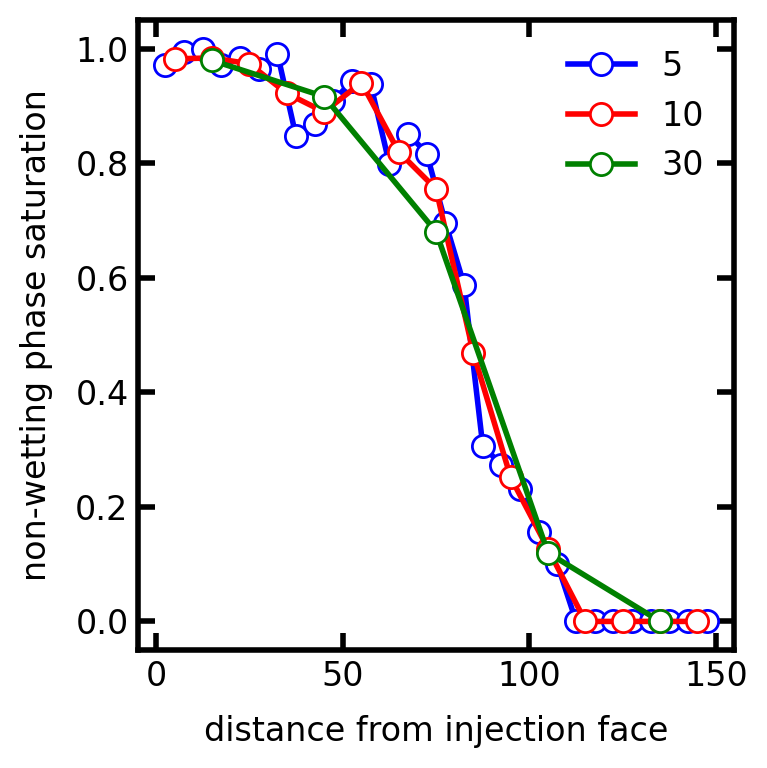

In [5]:
s = 5
s_prof1 = ps.metrics.satn_profile(satn=inv.im_snwp, s=0.6, span=s)

fig, ax = plt.subplots(figsize=[4, 4])
ax.plot(s_prof1.position, s_prof1.saturation, 'b-o', label=s)

s = 10
s_prof2 = ps.metrics.satn_profile(satn=inv.im_snwp, s=0.6, span=s)
ax.plot(s_prof2.position, s_prof2.saturation, 'r-o', label=s)

s = 30
s_prof3 = ps.metrics.satn_profile(satn=inv.im_snwp, s=0.6, span=s)
ax.plot(s_prof3.position, s_prof3.saturation, 'g-o', label=s)

ax.set_xlabel("distance from injection face")
ax.set_ylabel("non-wetting phase saturation")
ax.legend();

## `mode`
How the averaging window moves, either by sliding or by tiling. 

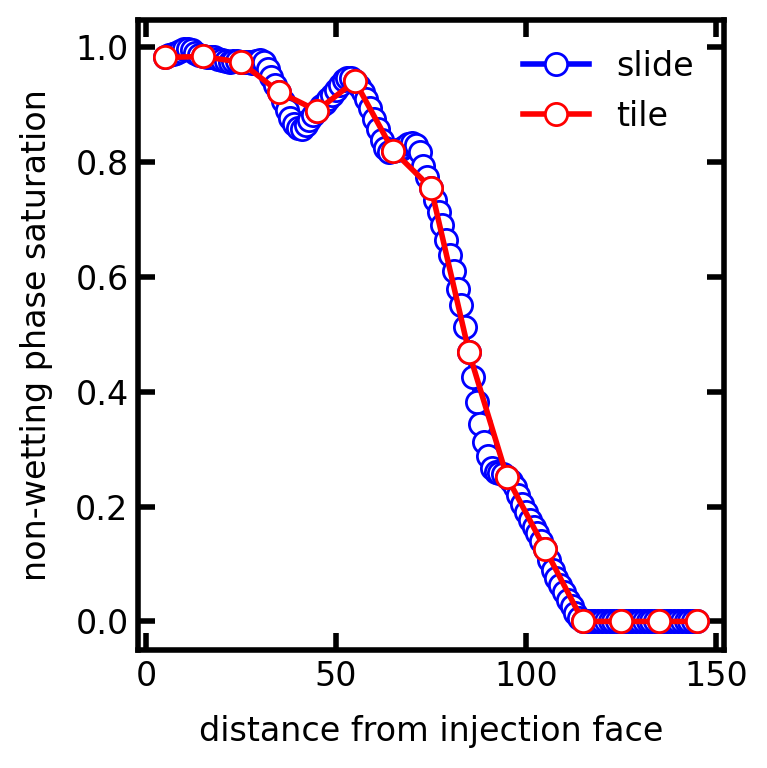

In [6]:
s_prof1 = ps.metrics.satn_profile(satn=inv.im_snwp, s=0.6, mode='slide')

fig, ax = plt.subplots(figsize=[4, 4])
ax.plot(s_prof1.position, s_prof1.saturation, 'b-o', label='slide')

s_prof2 = ps.metrics.satn_profile(satn=inv.im_snwp, s=0.6, mode='tile')
ax.plot(s_prof2.position, s_prof2.saturation, 'r-o', label='tile')

ax.set_xlabel("distance from injection face")
ax.set_ylabel("non-wetting phase saturation")
ax.legend();

## `axis`
The direction along with the averaging window moves. This can be perpendicular to the axis where the injection occurred to give additional insights into the saturation distribution:

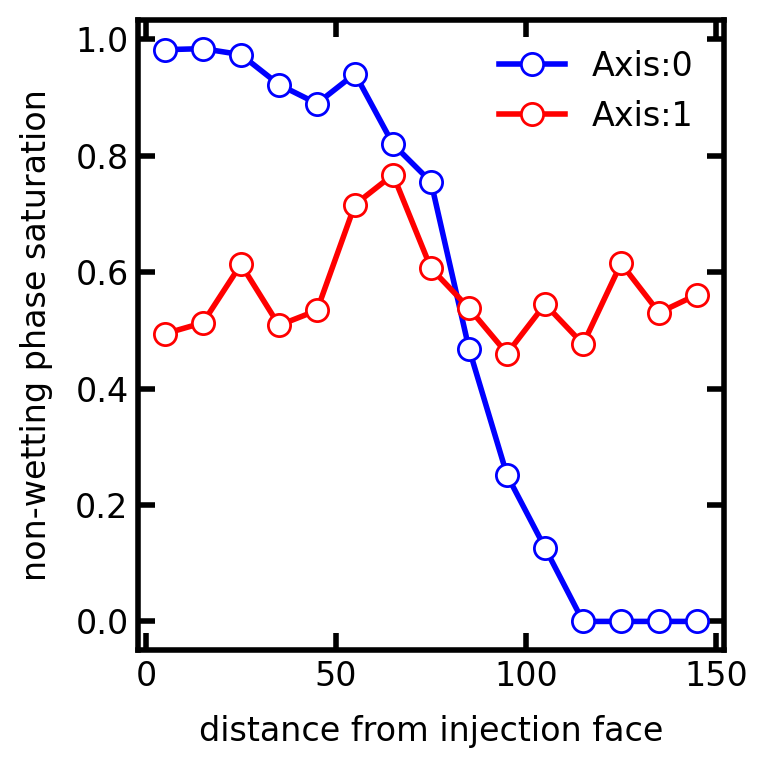

In [8]:
s_prof1 = ps.metrics.satn_profile(satn=inv.im_snwp, s=0.6, axis=0)

fig, ax = plt.subplots(figsize=[4, 4])
ax.plot(s_prof1.position, s_prof1.saturation, 'b-o', label='Axis:0')

s_prof2 = ps.metrics.satn_profile(satn=inv.im_snwp, s=0.6, axis=1)
ax.plot(s_prof2.position, s_prof2.saturation, 'r-o', label='Axis:1')

ax.set_xlabel("distance from injection face")
ax.set_ylabel("non-wetting phase saturation")
ax.legend();